In [162]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

# we are using the inline backend
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

In [163]:
# install xlrd
!pip install xlrd

print('xlrd installed!')

xlrd installed!


In [164]:
# df_can = pd.read_excel('https://ibm.box.com/shared/static/lw190pt9zpy5bd1ptyg2aw15awomz9pu.xlsx',
#                        sheet_name='Canada by Citizenship',
#                        skiprows=range(20),
#                        skip_footer=2)

# print ('Data read into a pandas dataframe!')

df_can = pd.read_excel('https://s3.hothienlac.com/yomitoon/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),)

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [165]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

In [166]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [167]:
df_can['Total'] = df_can[list(range(1980, 2014))].sum(axis=1)

In [168]:
years = list(range(1980,2014))

In [169]:
df_can = df_can[~df_can['Country'].isin(['Unknown', 'Total'])]

In [170]:
df_can

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
192,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,...,161,140,122,133,128,211,160,174,217,2985
193,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,...,91,77,71,64,60,102,69,46,59,1677


#Các quãng thời gian có số lượng người nhập cư tăng bất thường

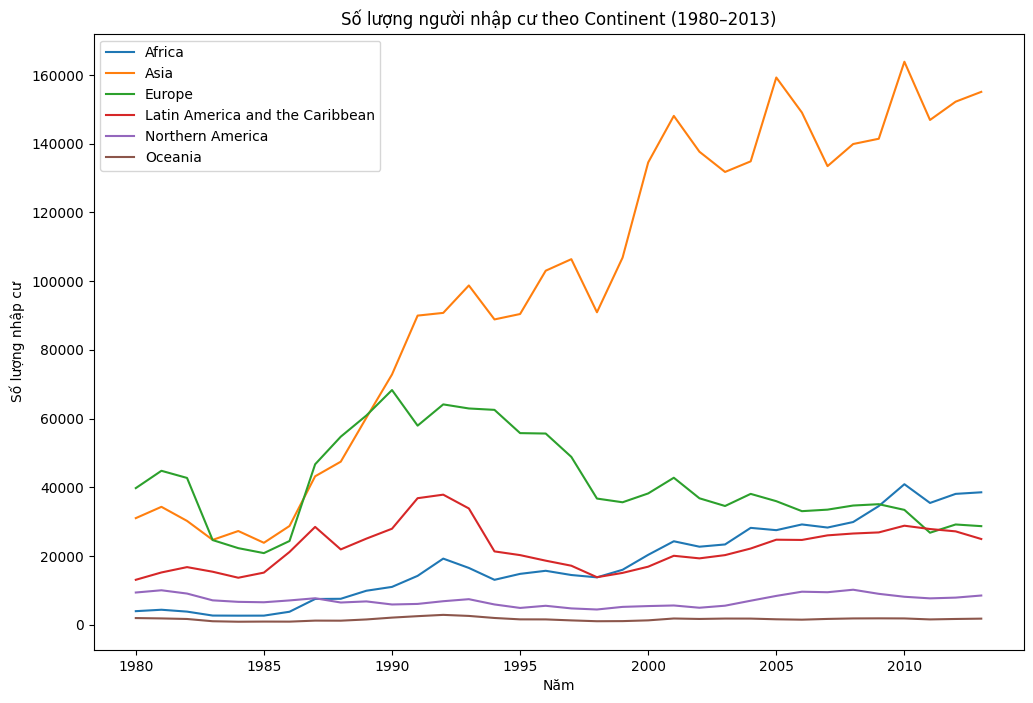

In [171]:
# Gom nhóm theo Continent và cộng dồn số lượng nhập cư
df_continent = df_can.groupby('Continent')[years].sum()

# Vẽ biểu đồ đường cho từng Continent
plt.figure(figsize=(12,8))
for continent in df_continent.index:
    plt.plot(years, df_continent.loc[continent], label=continent)

plt.title('Số lượng người nhập cư theo Continent (1980–2013)')
plt.xlabel('Năm')
plt.ylabel('Số lượng nhập cư')
plt.legend()
plt.show()

Phân tích lý do:
Năm 1985 đánh dấu một giai đoạn đặc biệt trong lịch sử nhập cư vào Canada, khi số lượng người nhập cư từ châu Âu tăng đột biến. Bối cảnh lúc đó là sự bất ổn chính trị và kinh tế tại Đông Âu, đặc biệt ở Ba Lan với phong trào “Solidarity” bị đàn áp, cùng khủng hoảng trong các quốc gia thuộc khối Xô Viết. Nhiều người dân tìm đường sang phương Tây để thoát khỏi chế độ cộng sản và khó khăn kinh tế. Đồng thời, Canada ban hành cải cách luật tị nạn vào giữa thập niên 1980, mở rộng cơ hội cho người xin tị nạn và đoàn tụ gia đình. Chính sự kết hợp giữa khủng hoảng ở châu Âu và chính sách nhân đạo của Canada đã tạo nên làn sóng nhập cư mạnh mẽ từ khu vực này. Trên đồ thị, ta thấy đường biểu diễn của Europe vọt lên rõ rệt vào năm 1985, phản ánh trực tiếp tác động của các sự kiện lịch sử và chính sách nhập cư trong thời kỳ đó.